In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from ast import literal_eval
import warnings; warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

### Preproccessing metadata

##### Read

In [4]:
meta = pd.read_csv('movies_metadata.csv', encoding='utf-8')
meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45

##### Year

In [5]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')
meta['year'] = meta['release_date'].dt.year
meta['year'].value_counts().sort_index()

year
1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: count, Length: 135, dtype: int64

##### Adult

In [6]:
print(*(i for i in meta['adult'].unique()), sep="\n")

False
True
 - Written by Ørnås
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.


Ánh xạ chuỗi 'True' hoặc 'False' trong meta['adult'] về thành kiểu boolean.

Nếu meta['adult'] không phải True hoặc False thì drop do dòng đó các giá trị trong dòng đó đảo lộn trật tự  

In [7]:
meta['adult'] = meta['adult'].map({'True': True, 'False': False})
meta.drop(meta[~meta['adult'].isin([True, False])].index, inplace=True)

##### original_language

In [8]:
meta['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [9]:
(meta['original_language'] == 'en').sum()

32269

Chỉ lấy những movies có original_language là tiếng Anh

In [10]:
meta = meta[meta['original_language'] == 'en']
meta = meta.reset_index(drop=True)

##### Status & Video

In [11]:
meta['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [12]:
print(*(i for i in meta['video'].unique()), sep="\n")


False
True
nan


##### Budget, runtime, popularity, revenue, vote_count, vote_average

với budget <= 0 chuyển thành np.nan
làm tương tự với runtime, popularity, revenue, vote_count, vote_average

In [13]:
meta['budget'] = meta['budget'].astype(str).apply(lambda x: int(x) if x.isdigit() else np.nan)
meta['popularity'] = pd.to_numeric(meta['popularity'], errors='coerce')

In [14]:
list_cols=['budget','runtime','popularity','revenue','vote_count','vote_average']
for i in list_cols:
    meta.loc[meta[i] <= 0, i] = np.nan

##### genres

In [15]:
meta['genres_list'] = meta['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta['genres_list'] = meta['genres_list'].apply(lambda x: x if x else ['other'])

##### production_companies & production_countries

In [16]:
meta['production_countries'] = meta['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta['production_countries'] = meta['production_countries'].apply(lambda x: x if x else ['other'])

meta['production_companies'] = meta['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta['production_companies'] = meta['production_companies'].apply(lambda x: x if x else ['other'])

#### New data

In [17]:
meta.isnull().sum()

adult                        0
belongs_to_collection    29156
budget                   24835
genres                       0
homepage                 26103
id                           0
imdb_id                     13
original_language            0
original_title               0
overview                    69
popularity                  50
poster_path                323
production_companies         0
production_countries         0
release_date                67
revenue                  25913
runtime                    757
spoken_languages             2
status                      70
tagline                  14336
title                        2
video                        2
vote_average              2252
vote_count                2165
year                        67
genres_list                  0
dtype: int64

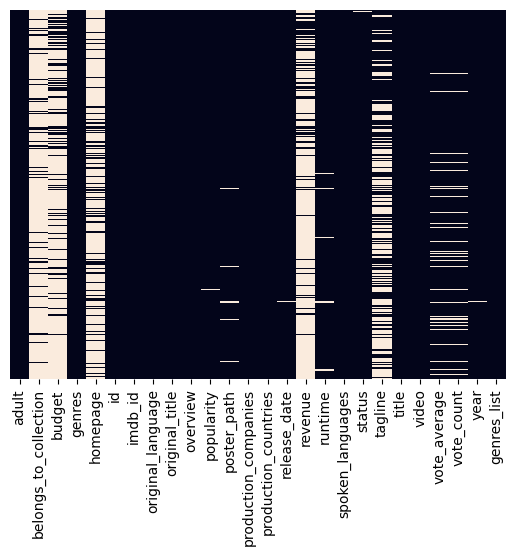

In [18]:
_ = sns.heatmap(meta.isnull(), yticklabels=False, cbar=False)

In [19]:
new = meta.drop(columns = ['imdb_id', 'adult', 'video', 'status', 'belongs_to_collection','budget', 'homepage', 'original_title', 'overview', 'spoken_languages', 'tagline', 'release_date', 'original_language', 'poster_path', 'revenue', 'genres'])
new.head()

,id,popularity,production_companies,production_countries,runtime,title,vote_average,vote_count,year,genres_list
0,862,21.946943,[Pixar Animation Studios],[United States of America],81.0,Toy Story,7.7,5415.0,1995.0,"[Animation, Comedy, Family]"
1,8844,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,Jumanji,6.9,2413.0,1995.0,"[Adventure, Fantasy, Family]"
2,15602,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,Grumpier Old Men,6.5,92.0,1995.0,"[Romance, Comedy]"
3,31357,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],127.0,Waiting to Exhale,6.1,34.0,1995.0,"[Comedy, Drama, Romance]"
4,11862,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,Father of the Bride Part II,5.7,173.0,1995.0,[Comedy]


### credits.csv

##### Read

In [20]:
credits = pd.read_csv('credits.csv', encoding='utf-8')
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


##### Actors

In [21]:
credits['actor'] = credits['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x[:5]] if isinstance(x, list) else [])
credits['actor'] = credits['actor'].apply(lambda x: x if x else ['unknown'])

##### Director

In [22]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return 'unknown'

In [23]:
credits['director_name'] = credits['crew'].apply(literal_eval).map(lambda x: get_director(x))

##### new

In [24]:
credits = credits.drop(columns = ['cast', 'crew'])
credits.head()

,id,actor,director_name
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch
3,31357,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker
4,11862,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer


### Keywords

In [25]:
key=pd.read_csv('keywords.csv')
key=key.drop_duplicates(subset='id', keep='first')
key

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [26]:
key['keywords'] = key['keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
key['keywords'] = key['keywords'].apply(lambda x: x if x else ['other'])


In [27]:
key

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."
...,...,...
46414,439050,[tragic love]
46415,111109,"[artist, play, pinoy]"
46416,67758,[other]
46417,227506,[other]


## Full data

In [28]:
new['id'] = meta['id'].astype(int)
merge_movies = pd.merge(new, credits, on='id', how='inner')
merge_movies = pd.merge(merge_movies, key, on='id', how='inner')
merge_movies.drop_duplicates(subset='id', keep='first', inplace=True)
merge_movies

,id,popularity,production_companies,production_countries,runtime,title,vote_average,vote_count,year,genres_list,actor,director_name,keywords
0,862,21.946943,[Pixar Animation Studios],[United States of America],81.0,Toy Story,7.7,5415.0,1995.0,"[Animation, Comedy, Family]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,Jumanji,6.9,2413.0,1995.0,"[Adventure, Fantasy, Family]","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'..."
2,15602,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,Grumpier Old Men,6.5,92.0,1995.0,"[Romance, Comedy]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],127.0,Waiting to Exhale,6.1,34.0,1995.0,"[Comedy, Drama, Romance]","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,"[based on novel, interracial relationship, sin..."
4,11862,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,Father of the Bride Part II,5.7,173.0,1995.0,[Comedy],"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,"[baby, midlife crisis, confidence, aging, daug..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32311,222848,0.661558,[Concorde-New Horizons],[United States of America],85.0,Caged Heat 3000,3.5,1.0,1995.0,[Science Fiction],"[Lisa Boyle, Kena Land, Zaneta Polard, Don Yan...",Aaron Osborne,[other]
32312,30840,5.683753,"[Westdeutscher Rundfunk (WDR), Working Title F...","[Canada, Germany, United Kingdom, United State...",104.0,Robin Hood,5.7,26.0,1991.0,"[Drama, Action, Romance]","[Patrick Bergin, Uma Thurman, David Morrissey,...",John Irvin,[other]
32313,67758,0.903007,[American World Pictures],[United States of America],90.0,Betrayal,3.8,6.0,2003.0,"[Action, Drama, Thriller]","[Erika Eleniak, Adam Baldwin, Julie du Page, J...",Mark L. Lester,[other]
32314,227506,0.003503,[Yermoliev],[Russia],87.0,Satan Triumphant,NaN,NaN,1917.0,[other],"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",Yakov Protazanov,[other]


In [29]:
merge_movies.isnull().sum()

id                         0
popularity                50
production_companies       0
production_countries       0
runtime                  757
title                      2
vote_average            2250
vote_count              2163
year                      67
genres_list                0
actor                      0
director_name              0
keywords                   0
dtype: int64

In [30]:
merge_movies = merge_movies.dropna()
merge_movies

,id,popularity,production_companies,production_countries,runtime,title,vote_average,vote_count,year,genres_list,actor,director_name,keywords
0,862,21.946943,[Pixar Animation Studios],[United States of America],81.0,Toy Story,7.7,5415.0,1995.0,"[Animation, Comedy, Family]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,Jumanji,6.9,2413.0,1995.0,"[Adventure, Fantasy, Family]","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'..."
2,15602,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,Grumpier Old Men,6.5,92.0,1995.0,"[Romance, Comedy]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],127.0,Waiting to Exhale,6.1,34.0,1995.0,"[Comedy, Drama, Romance]","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,"[based on novel, interracial relationship, sin..."
4,11862,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,Father of the Bride Part II,5.7,173.0,1995.0,[Comedy],"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,"[baby, midlife crisis, confidence, aging, daug..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32309,390959,0.076061,[other],[other],45.0,Shadow of the Blair Witch,7.0,2.0,2000.0,"[Mystery, Horror]","[Tony Abatemarco, Andre Brooks, Mariclare Cost...",Ben Rock,[blair witch]
32310,289923,0.386450,"[Neptune Salad Entertainment, Pirie Productions]",[United States of America],30.0,The Burkittsville 7,7.0,1.0,2000.0,[Horror],"[Monty Bane, Lucy Butler, David Grammer, Bill ...",Ben Rock,"[witch, mythology, legend, serial killer, mock..."
32311,222848,0.661558,[Concorde-New Horizons],[United States of America],85.0,Caged Heat 3000,3.5,1.0,1995.0,[Science Fiction],"[Lisa Boyle, Kena Land, Zaneta Polard, Don Yan...",Aaron Osborne,[other]
32312,30840,5.683753,"[Westdeutscher Rundfunk (WDR), Working Title F...","[Canada, Germany, United Kingdom, United State...",104.0,Robin Hood,5.7,26.0,1991.0,"[Drama, Action, Romance]","[Patrick Bergin, Uma Thurman, David Morrissey,...",John Irvin,[other]


In [52]:
merge_movies.to_csv('data.csv', index=False)

## Visualize

In [36]:
def get_counts(data, col):
    counts = {}
    for _, row in data.iterrows():
        if isinstance(row[col], list):
            genres = row[col]
            for genre in genres:
                if genre in counts:
                    counts[genre] += 1
                else:
                    counts[genre] = 1
    return counts

In [37]:
# Get the base counts of each category and sort them by counts
base_counts = get_counts(merge_movies, 'genres_list')
base_counts = pd.DataFrame(index=base_counts.keys(), data=base_counts.values(), columns=['Counts'])
base_counts.sort_values(by='Counts', inplace=True)

# Plot the chart which shows top genres and separate by color where genre<1000
colors = ['#abaeab' if count < 1000 else '#A0E045' for count in base_counts['Counts']]
fig = px.bar(x=base_counts.index, y=base_counts['Counts'], title='Most Popular Genre', color_discrete_sequence=colors, color=base_counts.index)
fig.show()

In [60]:
def plot_value_counts_bar(data, col):
    vc = data[col].value_counts().reset_index()
    fig = px.bar(vc, y='count', x=col, color='count', title=col)  
    return fig

In [61]:
plot_value_counts_bar(merge_movies,'year')

In [55]:
import math
def get_ratings(data, col, ratings_col):
    base_counts = get_counts(data, col)
    category_ratings = {}
    a = {}

    for _, row in data.iterrows():
        if isinstance(row[col], list):
            genres = row[col]
            for genre in genres:
                if not math.isnan(row['vote_count']):
                    if genre in category_ratings:
                        category_ratings[genre] += row[ratings_col]
                    else:
                        category_ratings[genre] = row[ratings_col]
    for genre in base_counts:
        a[genre] = round(category_ratings[genre] / base_counts[genre], 2)
    return a

In [58]:
base_counts = get_ratings(merge_movies, 'genres_list', 'vote_count')
base_counts = pd.DataFrame(index=base_counts.keys(),
                           data=base_counts.values(),
                           columns=['Counts'])
base_counts.sort_values(by='Counts', inplace=True)
fig = px.pie(names=base_counts.index,
             values=base_counts['Counts'],
             title='Most Popular Genre by Votes',
             color=base_counts.index)
fig.show()